In [1]:
import numpy as np
import pandas as pd

In [2]:
df =pd.read_excel('spam.xlsx')

In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [6]:
df.rename(columns={'v1':'Target','v2':'Text'},inplace=True)

In [7]:
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
Encoder=LabelEncoder()

In [10]:
df['Target']=Encoder.fit_transform(df['Target'])

In [11]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
##Missing values

In [13]:
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [14]:
###Check for the duplicate values

In [15]:
df.duplicated().sum()

403

In [16]:
df=df.drop_duplicates(keep='first')

EDA

In [17]:
df['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

In [18]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0xb08dad8>,
 [Text(-1.0144997251399075, 0.42519443516002464, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001339, '87.367'),
  Text(0.5533635081542612, -0.23192418555038377, '12.633')])

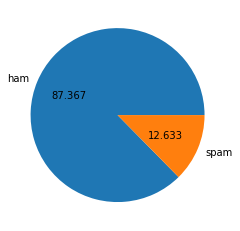

In [19]:
plt.pie(df['Target'].value_counts(),labels=['ham','spam'],autopct='%0.3f')

In [20]:
##Data is Imbalanced

In [21]:
import nltk

In [22]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
type(df['Text'])

pandas.core.series.Series

In [24]:
df['num_characters'] = df['Text'].str.len()

C:\Users\DELL\AppData\Local\Temp\ipykernel_1980\3080558215.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['Text'].str.len()


In [25]:
#Num of words


In [26]:
df['Text']= df['Text'].astype('string')

C:\Users\DELL\AppData\Local\Temp\ipykernel_1980\3636883605.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Text']= df['Text'].astype('string')


In [27]:
df['num_words']=df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\DELL\AppData\Local\Temp\ipykernel_1980\675848441.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']=df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [28]:
df

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111.0,24
1,0,Ok lar... Joking wif u oni...,29.0,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155.0,37
3,0,U dun say so early hor... U c already then say...,49.0,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61.0,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161.0,35
5568,0,Will Ì_ b going to esplanade fr home?,37.0,9
5569,0,"Pity, * was in mood for that. So...any other s...",57.0,15
5570,0,The guy did some bitching but I acted like i'd...,125.0,27


In [29]:
df['num_Sent']=df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\DELL\AppData\Local\Temp\ipykernel_1980\118679051.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_Sent']=df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [30]:
df[['num_characters','num_words','num_Sent']].describe()

,num_characters,num_words,num_Sent
count,5168.000000,5169.000000,5169.000000
mean,78.994969,18.453279,1.947185
std,58.235445,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [31]:
df[df['Target']==0][['num_characters','num_words','num_Sent']].describe()

,num_characters,num_words,num_Sent
count,4515.000000,4516.000000,4516.000000
mean,70.476855,17.120903,1.799601
std,56.359585,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [32]:
df[df['Target']==1][['num_characters','num_words','num_Sent']].describe()

,num_characters,num_words,num_Sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [33]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

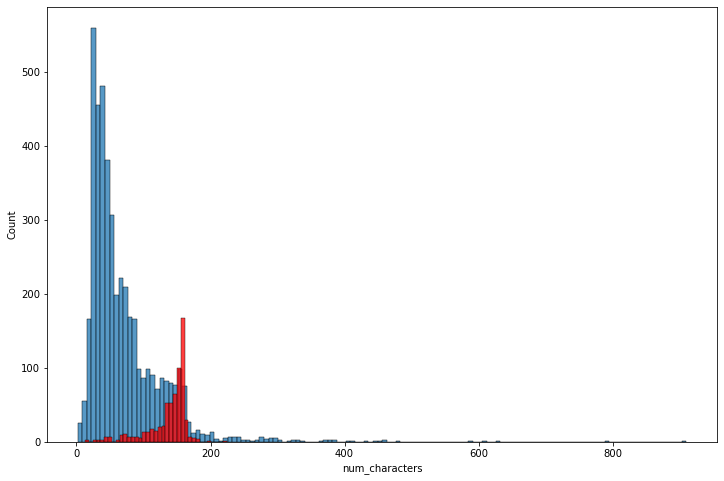

In [34]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['Target']==0]['num_characters'])
sns.histplot(df[df['Target']==1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

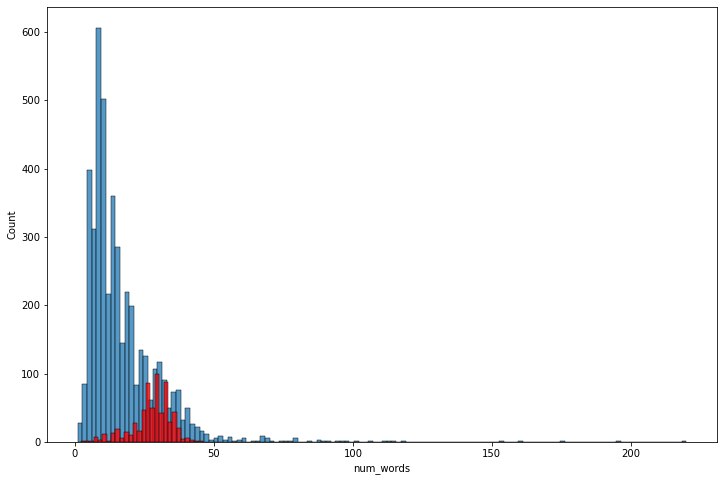

In [35]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['Target']==0]['num_words'])
sns.histplot(df[df['Target']==1]['num_words'],color='red')

<AxesSubplot:xlabel='num_Sent', ylabel='Count'>

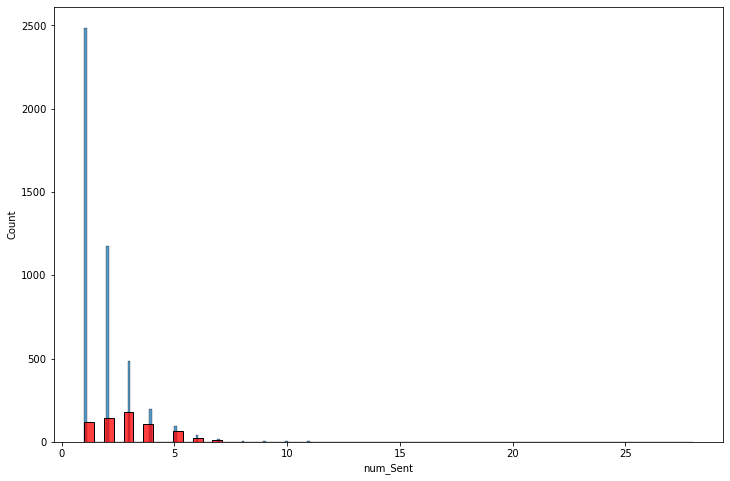

In [36]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['Target']==0]['num_Sent'])
sns.histplot(df[df['Target']==1]['num_Sent'],color='red')

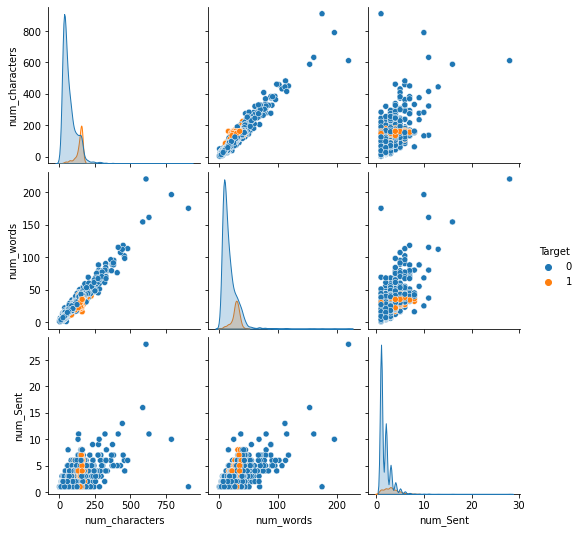

In [37]:
sns.pairplot(df,hue='Target')

<AxesSubplot:>

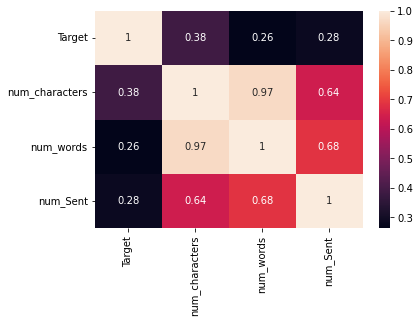

In [38]:
sns.heatmap(df.corr(),annot=True)

####  #Data Preprocessing
1 Lower case
2 Tokenization
3 Removing special characters
4 Removing stop words and punctuation
5 Stemming

In [39]:
from nltk.corpus import stopwords
import string

In [40]:

def Transform_text(text):
    text=text.lower()
    text= nltk.word_tokenize(text)
    

    u=[]
    for i in text:
        if i.isalnum():
            u.append(i)
            
    text=u[:]
    u.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            u.append(i)
            
    text=u[:]
    u.clear()
    
    for i in text:
        u.append(ps.stem(i))
    return ' '.join(u)

In [41]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [42]:
Transform_text(df['Text'][10])

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [43]:
df['Transform_text']=df['Text'].apply(Transform_text)

C:\Users\DELL\AppData\Local\Temp\ipykernel_1980\3214254929.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Transform_text']=df['Text'].apply(Transform_text)


In [44]:
df.head()

,Target,Text,num_characters,num_words,num_Sent,Transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111.0,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29.0,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155.0,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49.0,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61.0,15,1,nah think goe usf live around though


In [45]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [46]:
spam_wc=wc.generate(df[df['Target']==1]['Transform_text'].str.cat(sep=' '))

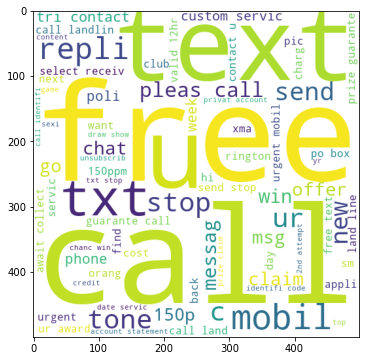

In [47]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [48]:
ham_wc=wc.generate(df[df['Target']==0]['Transform_text'].str.cat(sep=' '))

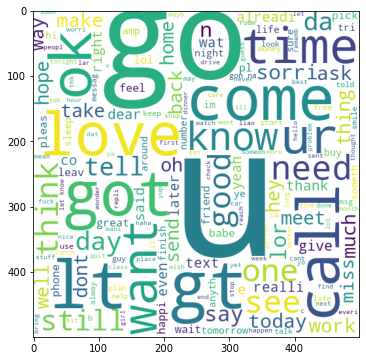

In [49]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [50]:
spam_corpus=[]
for msg in df[df['Target']==1]['Transform_text'].tolist():
    for words in msg.split():
        spam_corpus.append(words)
        

In [51]:
len(spam_corpus)

9939

In [52]:
from collections import Counter

In [53]:
pd.DataFrame(Counter(spam_corpus).most_common(30),columns=['word','count']).head()

,word,count
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


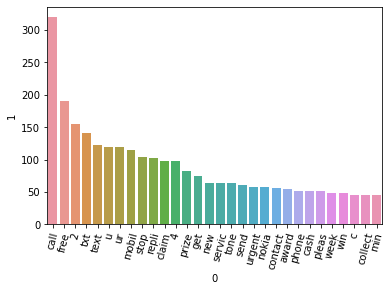

In [54]:

sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='75')
plt.show()

In [55]:
ham_corpus=[]
for msg in df[df['Target']==0]['Transform_text'].tolist():
    for words in msg.split():
        ham_corpus.append(words)

In [56]:
len(ham_corpus)

35392

In [57]:
pd.DataFrame(Counter(ham_corpus).most_common(30),columns=['word','count']).head()

,word,count
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


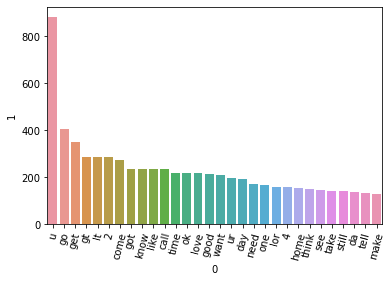

In [58]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='75')
plt.show()

### Model Building

In [59]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tv=TfidfVectorizer()

In [60]:
X=tv.fit_transform(df['Transform_text']).toarray()
X.shape

(5169, 6708)

In [61]:
y=df['Target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [64]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [65]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [66]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [67]:
mnb.fit(X_train,y_train)
y_pred1=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [68]:
bnb.fit(X_train,y_train)
y_pred1=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [69]:
##We choose Tfidf and Mnb

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [71]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [72]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    
}

In [73]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [74]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9729206963249516, 0.9741379310344828)

In [75]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828
For  KN
Accuracy -  0.9003868471953579
Precision -  1.0
For  NB
Accuracy -  0.9593810444874274
Precision -  1.0
For  DT
Accuracy -  0.9361702127659575
Precision -  0.8461538461538461
For  LR
Accuracy -  0.9516441005802708
Precision -  0.94
For  RF
Accuracy -  0.971953578336557
Precision -  0.990990990990991
For  AdaBoost
Accuracy -  0.9622823984526112
Precision -  0.9541284403669725
For  BgC
Accuracy -  0.960348162475822
Precision -  0.8646616541353384
For  ETC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  GBDT
Accuracy -  0.9526112185686654
Precision -  0.9238095238095239


In [76]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [78]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.971954,0.990991
8,ETC,0.975822,0.974790
0,SVC,0.972921,0.974138
6,AdaBoost,0.962282,0.954128
4,LR,0.951644,0.940000
9,GBDT,0.952611,0.923810
7,BgC,0.960348,0.864662
3,DT,0.936170,0.846154


In [81]:
import pickle
pickle.dump(tv,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))
